In [ ]:
'''Saturn Ring Tilt Calculation and Visualization
Overview:
This project calculates and visualizes the tilt of Saturn's rings as seen from Earth. The tilt changes based on Saturn’s position in its orbit and affects how visible the rings are.

Key Concepts:
Tilt Angle: Determines which side of Saturn's rings is visible:
Positive tilt: Northern side of the rings is visible.
Negative tilt: Southern side of the rings is visible.

Visibility:
Maximum Tilt: Rings appear wide and bright.
Edge-On (0° Tilt): Rings appear thin and nearly invisible.

Features:
Current Tilt: Calculate the current tilt of Saturn’s rings or for a specific date.
Tilt Over Time: Visualize how the tilt angle evolves over a given period (e.g., years).

Use Case:
Useful for astronomers and space enthusiasts to predict Saturn's ring visibility and plan observations.'''

In [1]:
!pip install ephem

   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
    --------------------------------------- 0.0/1.4 MB ? eta -:--:--
   - -------------------------------------- 0.0/1.4 MB 388.9 kB/s eta 0:00:04
   - -------------------------------------- 0.0/1.4 MB 388.9 kB/s eta 0:00:04
   -- ------------------------------------- 0.1/1.4 MB 456.6 kB/s eta 0:00:03
   -- ------------------------------------- 0.1/1.4 MB 451.8 kB/s eta 0:00:03
   --- ------------------------------------ 0.1/1.4 MB 450.6 kB/s eta 0:00:03
   ---- ----------------------------------- 0.2/1.4 MB 458.0 kB/s eta 0:00:03
   ----- ---------------------------------- 0.2/1.4 MB 540.4 kB/s eta 0:00:03
   ------ --------------------------------- 0.2/1.4 MB 576.2 kB/s eta 0:00:03
   -------- ------------------------------- 0.3/1.4 MB 609.0 kB/s eta 0:00:02
   -------- ------------------------------- 0.3/1.4 MB 633.4 kB/s eta 0:00:02
   --------- ------------------------------ 0.3/1.4 MB 654.9 kB/s eta 0:00:02
   -

In [5]:
!pip install --upgrade numpy
!pip install --upgrade matplotlib


     ---------------------------------------- 0.0/59.7 kB ? eta -:--:--
     -------------------- ------------------- 30.7/59.7 kB 1.4 MB/s eta 0:00:01
     -------------------- ------------------- 30.7/59.7 kB 1.4 MB/s eta 0:00:01
     -------------------------------- ----- 51.2/59.7 kB 327.7 kB/s eta 0:00:01
     -------------------------------------- 59.7/59.7 kB 287.8 kB/s eta 0:00:00
   ---------------------------------------- 0.0/12.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.6 MB 667.8 kB/s eta 0:00:19
   ---------------------------------------- 0.1/12.6 MB 657.6 kB/s eta 0:00:19
   ---------------------------------------- 0.1/12.6 MB 585.1 kB/s eta 0:00:22
   ---------------------------------------- 0.1/12.6 MB 598.8 kB/s eta 0:00:21
   ---------------------------------------- 0.1/12.6 MB 525.1 kB/s eta 0:00:24
   ---------------------------------------- 0.1/12.6 MB 449.7 kB/s eta 0:

  You can safely remove it manually.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
contourpy 1.2.0 requires numpy<2.0,>=1.20, but you have numpy 2.1.1 which is incompatible.
numba 0.59.1 requires numpy<1.27,>=1.22, but you have numpy 2.1.1 which is incompatible.
pywavelets 1.5.0 requires numpy<2.0,>=1.22.4, but you have numpy 2.1.1 which is incompatible.
streamlit 1.32.0 requires numpy<2,>=1.19.3, but you have numpy 2.1.1 which is incompatible.


   ---------------------- ----------------- 7.1/12.6 MB 294.3 kB/s eta 0:00:19
   ---------------------- ----------------- 7.1/12.6 MB 294.3 kB/s eta 0:00:19
   ---------------------- ----------------- 7.1/12.6 MB 294.3 kB/s eta 0:00:19
   ---------------------- ----------------- 7.2/12.6 MB 293.9 kB/s eta 0:00:19
   ---------------------- ----------------- 7.2/12.6 MB 294.4 kB/s eta 0:00:19
   ---------------------- ----------------- 7.2/12.6 MB 294.4 kB/s eta 0:00:19
   ---------------------- ----------------- 7.2/12.6 MB 294.4 kB/s eta 0:00:19
   ----------------------- ---------------- 7.2/12.6 MB 293.7 kB/s eta 0:00:19
   ----------------------- ---------------- 7.2/12.6 MB 293.8 kB/s eta 0:00:19
   ----------------------- ---------------- 7.3/12.6 MB 293.7 kB/s eta 0:00:19
   ----------------------- ---------------- 7.3/12.6 MB 293.7 kB/s eta 0:00:19
   ----------------------- ---------------- 7.3/12.6 MB 293.6 kB/s eta 0:00:19
   ----------------------- ---------------- 7.3/12.6

C:\Users\thouf\AppData\Local\Temp\ipykernel_24848\11485256.py:12: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  observer.date = datetime.utcnow()  # Use current UTC time
C:\Users\thouf\AppData\Local\Temp\ipykernel_24848\11485256.py:43: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  saturn_ring_tilt_evolve(start_time=datetime.utcnow(),
C:\Users\thouf\AppData\Local\Temp\ipykernel_24848\11485256.py:44: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  end_time = datetime.utcnow() + timedelta(weeks=520))


Current tilt of Saturn's rings: 3.852068844626512 degrees


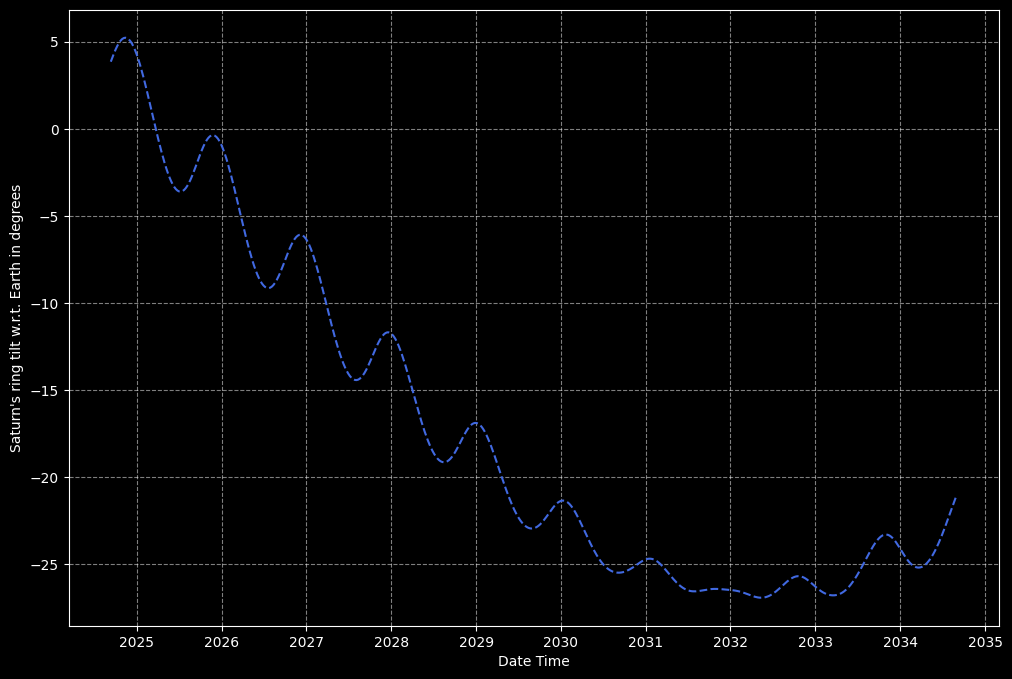

In [1]:
import ephem
from matplotlib import pyplot as plt
import numpy as np

from datetime import datetime, timedelta

def saturn_ring_tilt(datetime_obj=None):
    """Calculates the tilt angle of Saturn's rings as seen from Earth at a datetime."""

    observer = ephem.Observer()
    if not datetime_obj:
        observer.date = datetime.utcnow()  # Use current UTC time
    else:
        observer.date = datetime_obj

    saturn = ephem.Saturn(observer)

    # Get Saturn's sub-observer point latitude (ring plane inclination)
    ring_plane_inclination = saturn.earth_tilt

    # Convert to degrees
    tilt_angle = np.degrees(ring_plane_inclination)

    return tilt_angle

def saturn_ring_tilt_evolve(start_time, end_time):
    """Evolves the tilt angle of Saturn's rings over time."""
    tilt_angles = []
    tilt_datetimes = []
    time = start_time
    while time <= end_time:
        tilt_angle = saturn_ring_tilt(time)
        tilt_angles.append(tilt_angle)
        tilt_datetimes.append(time)
        time += timedelta(weeks=1)
    return tilt_angles, tilt_datetimes

if __name__ == "__main__":
    tilt = saturn_ring_tilt()
    print("Current tilt of Saturn's rings:", tilt, "degrees")

    ring_tilt_angles, ring_tilt_datetimes = \
        saturn_ring_tilt_evolve(start_time=datetime.utcnow(),
                                end_time = datetime.utcnow() + timedelta(weeks=520))

    plt.style.use('dark_background')

    fig, ax = plt.subplots(figsize=(12, 8))

    ax.plot(ring_tilt_datetimes,
            ring_tilt_angles,
            linestyle='--',
            color='royalblue')

    ax.grid(True, linestyle='dashed', alpha=0.5)

    ax.set_xlabel("Date Time")
    ax.set_ylabel("Saturn's ring tilt w.r.t. Earth in degrees")

    plt.show()
     